In [1]:
import selenium                                                     #
from selenium import webdriver             # webdriver for selenium.
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains    # Action chain to imitate mouse hovering and mouse scroling.
from selenium.webdriver.chrome.options import Options      # oprions for the webdriver such as incognito mode it works faster then ordanary mode.
from selenium.webdriver.support.ui import WebDriverWait     # WebDriverWait function enshures that the web page is fully loaded.
from selenium.common.exceptions import TimeoutException       # Use for error handeling in case of timeout exaption.
from selenium.common.exceptions import NoSuchElementException    # Use for error handeling in case of missing element in the webdriver
from selenium.webdriver.support import expected_conditions as EC     # general selenum exceprions library 
import pandas as pd  # pandas library for dataframes in order to accomedate the data in to those frames
import os
# imports 
import numpy as np
import pandas as pd
from sklearn import linear_model
import plotly.express as px
from sklearn.metrics import mean_squared_error
import seaborn as sns


#and visualization setup
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

ModuleNotFoundError: No module named 'plotly'

In [10]:
df = pd.read_csv(r'israel.csv')
df

,Unnamed: 0,Country,Year,Road motor vehicles per one million units of current USD GDP,CO2 emissions from transport in tonnes per one million units of current USD GDP,Road traffic in vehicle-km per one thousand units of current USD GDP,Share of household expenditure for purchase of vehicles in total household expenditure for transport,Road casualties (injured + killed),Road injury accident,Road fatalities per one million inhabitant,Killed - rate per population,Killed
0,0,Israel,2010,272.5,53.0,213.1,24.4,29526.0,15318.0,49.2,4.9,375.0
1,1,Israel,2011,281.7,53.0,194.2,23.4,28643.0,14742.0,49.2,4.9,382.0
2,2,Israel,2012,286.9,53.0,194.8,21.8,25394.0,13094.0,36.7,3.7,290.0
3,3,Israel,2013,293.1,54.3,175.0,23.7,26364.0,14114.0,38.3,3.8,309.0
4,4,Israel,2014,301.9,51.7,169.0,26.8,23840.0,12797.0,38.8,3.9,319.0
5,5,Israel,2015,311.1,56.4,182.7,24.2,24248.0,13104.0,42.5,4.2,356.0
6,6,Israel,2016,321.9,54.9,179.6,29.9,24191.0,12966.0,44.1,4.4,377.0
7,7,Israel,2017,330.7,50.9,169.0,23.9,24987.0,13628.0,41.8,4.2,364.0
8,8,Israel,2018,338.1,48.7,165.2,24.1,23019.0,12557.0,35.6,3.6,316.0


In [41]:
print(df.columns)

Index(['Unnamed: 0', 'Country', 'Year',
       'Road motor vehicles per one million units of current USD GDP',
       'CO2 emissions from transport in tonnes per one million units of current USD GDP',
       'Road traffic in vehicle-km per one thousand units of current USD GDP',
       'Share of household expenditure for purchase of vehicles in total household expenditure for transport',
       'Road casualties (injured + killed)', 'Road injury accident',
       'Road fatalities per one million inhabitant',
       'Killed - rate per population', 'Killed'],
      dtype='object')


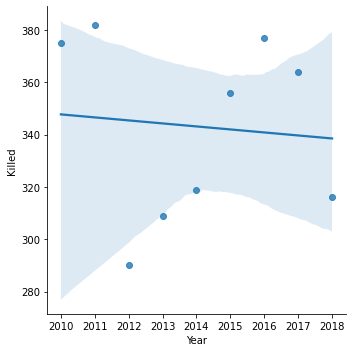

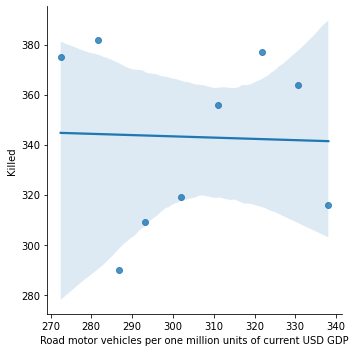

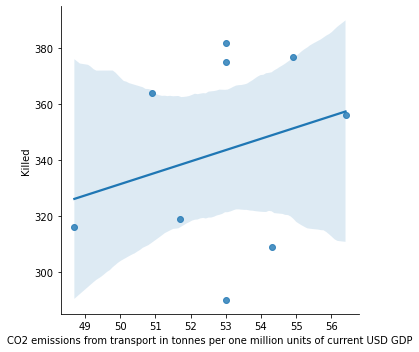

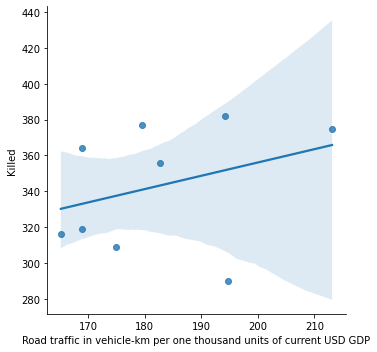

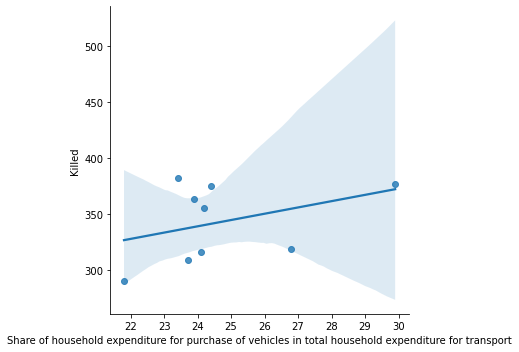

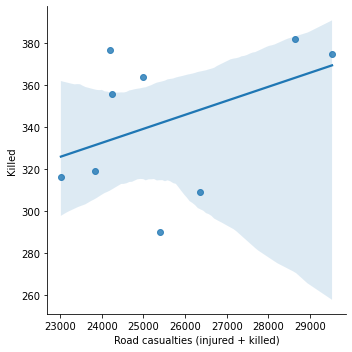

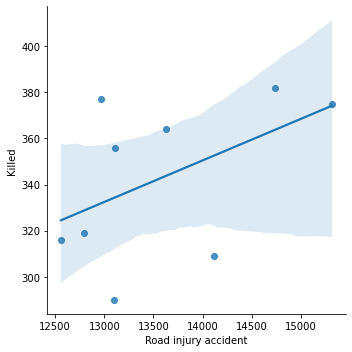

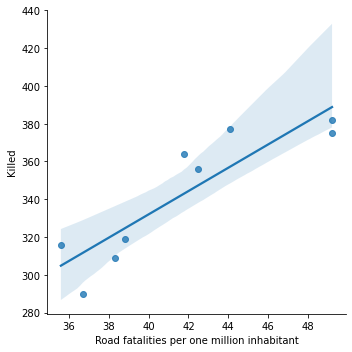

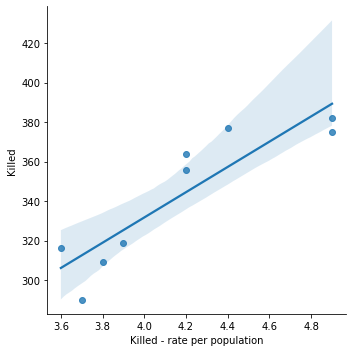

In [40]:
sns.lmplot(x='Year',y='Killed',data=df)
sns.lmplot(x='Road motor vehicles per one million units of current USD GDP',y='Killed',data=df)
sns.lmplot(x='CO2 emissions from transport in tonnes per one million units of current USD GDP',y='Killed',data=df)
sns.lmplot(x='Road traffic in vehicle-km per one thousand units of current USD GDP',y='Killed',data=df)
sns.lmplot(x='Share of household expenditure for purchase of vehicles in total household expenditure for transport',y='Killed',data=df)
sns.lmplot(x='Road casualties (injured + killed)',y='Killed',data=df)
sns.lmplot(x='Road injury accident',y='Killed',data=df)
sns.lmplot(x='Road fatalities per one million inhabitant',y='Killed',data=df)
sns.lmplot(x='Killed - rate per population',y='Killed',data=df)


In [63]:
x=df['Killed']
x

0    375.0
1    382.0
2    290.0
3    309.0
4    319.0
5    356.0
6    377.0
7    364.0
8    316.0
Name: Killed, dtype: float64

In [74]:
y=df[['Year','Road motor vehicles per one million units of current USD GDP',
       'CO2 emissions from transport in tonnes per one million units of current USD GDP',
       'Road traffic in vehicle-km per one thousand units of current USD GDP',
       'Share of household expenditure for purchase of vehicles in total household expenditure for transport',
       'Road casualties (injured + killed)', 'Road injury accident',
       'Road fatalities per one million inhabitant',
       'Killed - rate per population']]
y

,Year,Road motor vehicles per one million units of current USD GDP,CO2 emissions from transport in tonnes per one million units of current USD GDP,Road traffic in vehicle-km per one thousand units of current USD GDP,Share of household expenditure for purchase of vehicles in total household expenditure for transport,Road casualties (injured + killed),Road injury accident,Road fatalities per one million inhabitant,Killed - rate per population
0,2010,272.5,53.0,213.1,24.4,29526.0,15318.0,49.2,4.9
1,2011,281.7,53.0,194.2,23.4,28643.0,14742.0,49.2,4.9
2,2012,286.9,53.0,194.8,21.8,25394.0,13094.0,36.7,3.7
3,2013,293.1,54.3,175.0,23.7,26364.0,14114.0,38.3,3.8
4,2014,301.9,51.7,169.0,26.8,23840.0,12797.0,38.8,3.9
5,2015,311.1,56.4,182.7,24.2,24248.0,13104.0,42.5,4.2
6,2016,321.9,54.9,179.6,29.9,24191.0,12966.0,44.1,4.4
7,2017,330.7,50.9,169.0,23.9,24987.0,13628.0,41.8,4.2
8,2018,338.1,48.7,165.2,24.1,23019.0,12557.0,35.6,3.6


In [76]:
reg = linear_model.LinearRegression()
reg.fit(y,x)

LinearRegression()

In [77]:
print(reg.coef_)
print('--------------')
print(reg.intercept_)

[-5.51817999e+01  6.50153861e+00  2.39294650e+00 -2.35378430e-01
  1.56544425e-01 -2.31677407e-02  3.88569068e-02  3.31875897e+00
  3.33215190e+01]
--------------
109200.54398112466


In [79]:
print(reg.predict([[2023,370,39,150,22,21000,12000,33,3.3]])) #just e.g

[234.03465259]


In [84]:
from sklearn.metrics import r2_score

r2_score(df[['Year','Road motor vehicles per one million units of current USD GDP',
       'CO2 emissions from transport in tonnes per one million units of current USD GDP',
       'Road traffic in vehicle-km per one thousand units of current USD GDP',
       'Share of household expenditure for purchase of vehicles in total household expenditure for transport',
       'Road casualties (injured + killed)', 'Road injury accident',
       'Road fatalities per one million inhabitant',
       'Killed - rate per population']].tolist(),reg.predict(df.x.flatten())) #fix

AttributeError: 'DataFrame' object has no attribute 'tolist'